In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(r"C:\Users\fatih\Downloads\Call_Report_BankData_852218.parquet", engine='fastparquet')
df.head()

,Item,IDRSSD,Value,Date,CValue,schedule,schedule.label,Label1clean,Label2clean,Label3clean,...,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,852218.0,1.644990e+11,2014-03-31,1.644990e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,852218.0,1.683120e+11,2014-06-30,3.813000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,852218.0,1.705590e+11,2014-09-30,2.247000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,852218.0,1.733280e+11,2014-12-31,2.769000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,852218.0,1.781850e+11,2015-03-31,1.781850e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main


In [3]:
call_report_bankdata = df
df2 = call_report_bankdata.pivot_table(index='Date', columns=['schedule','labelStringclean'], values='CValue', aggfunc='sum')
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                             \
labelStringclean Available-for-sale debt securities   
Date                                                  
2001-03-31                             6.036100e+10   
2001-06-30                             5.420000e+08   
2001-09-30                            -2.316000e+09   
2001-12-31                            -5.671000e+09   
2002-03-31                             5.615900e+10   

schedule                                                                       \
labelStringclean Bank's fiscal year-end date (report the date in MMDD format)   
Date                                                                            
2001-03-31                                                      NaN             
2001-06-30                                                      NaN             
2001-09-30                                                      NaN             
2001-12-31                                                      NaN             
2002-03-31                                                      NaN             

schedule                        \
labelStringclean  Common stock   
Date                             
2001-03-31        1.211000e+09   
2001-06-30        0.000000e+00   
2001-09-30        0.000000e+00   
2001-12-31        2.650000e+08   
2002-03-31        1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                       

In [4]:
df2.isnull().sum().sort_values(ascending=False).sort_values()

schedule  labelStringclean                                                                                                                                  
RI        Commodity and other exposures                                                                                                                          0
RCB       Fair value                                                                                                                                             0
RIBII     Provisions for credit losses                                                                                                                           0
RCB       Home equity lines                                                                                                                                      0
RIBII     Balance most recently reported for the December 31, 2022, Reports of Condition and Income (i.e., after adjustments from amended Reports of Income)     0
                            

In [8]:
is_null = pd.DataFrame(df2.isnull().sum(), columns = ['isnull']).sort_values(by="isnull", ascending=False)
is_null

isnull
schedule labelStringclean                                          
RCRI     Distributions and discretionary bonus payments ...      88
RCB      Unallocated portfolio layer fair value hedge ba...      88
RCRI     Eligible retained income                                88
RCM      Estimated number of international remittance tr...      87
         Estimated number of international remittance tr...      87
...                                                             ...
RCT      Total gross fiduciary and related services income        0
RCD      Securities issued by states and political subdi...       0
         Total trading assets                                     0
         Total trading liabilities                                0
RI       Commodity and other exposures                            0

[943 rows x 1 columns]

In [9]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCRI     Distributions and discretionary bonus payments ...        98.876404
RCB      Unallocated portfolio layer fair value hedge ba...        98.876404
RCRI     Eligible retained income                                  98.876404
RCM      Estimated number of international remittance tr...        97.752809
         Estimated number of international remittance tr...        97.752809
RIE      Effect of adoption of Current Expected Credit L...        96.629213
         Initial allowances for credit losses recognized...        96.629213
         Effect of adoption of current expected credit l...        96.629213
RCRI     Leverage ratio                                            95.505618
RCCI     Other loans                                               95.505618
RCRI     Common equity tier 1 capital ratio                        95.505618
         Total capital ratio                                       95.505618
         Tier 1 capital ratio                                      95.505618
RCCII    "Loans to finance agricultural production and o...        94.382022
         "Loans secured by nonfarm nonresidential proper...        94.382022

In [10]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,schedule,labelStringclean,isnull,percentage_null
0,RCRI,Distributions and discretionary bonus payments...,88,98.876404
1,RCB,Unallocated portfolio layer fair value hedge b...,88,98.876404
2,RCRI,Eligible retained income,88,98.876404
3,RCM,Estimated number of international remittance t...,87,97.752809
4,RCM,Estimated number of international remittance t...,87,97.752809
...,...,...,...,...
938,RCT,Total gross fiduciary and related services income,0,0.000000
939,RCD,Securities issued by states and political subd...,0,0.000000
940,RCD,Total trading assets,0,0.000000
941,RCD,Total trading liabilities,0,0.000000


In [11]:
def df_nans(df2, limit):
    missing = df2.isnull().sum()*100 / df2.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [12]:
df_nans(df2, 90)

schedule  labelStringclean                                                                                                                                                                                                                                          
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                                                                                                                98.876404
RCCI      Other loans                                                                                                                                                                                                                                                   95.505618
RCCII     "Commercial and industrial loans" reported in Schedule RC-C, part I, item 4                                                                                                          

In [13]:
df_nans(df2, 90).index

MultiIndex([(  'RCB', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            (  'RCL', ...),
            (  'RCM', ...),
            (  'RCM', ...),
            (  'RCO', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'])

In [14]:
df_nans(df2, 80).values

array([83.14606742, 80.8988764 , 98.87640449, 85.39325843, 95.50561798,
       85.39325843, 89.88764045, 94.38202247, 94.38202247, 94.38202247,
       94.38202247, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       92.13483146, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       85.39325843, 94.38202247, 83.14606742, 82.02247191, 84.26966292,
       97.75280899, 97.75280899, 84.26966292, 89.88764045, 89.88764045,
       89.88764045, 89.88764045, 89.88764045, 89.88764045, 89.88764045,
       91.01123596, 80.8988764 , 80.8988764 , 80.8988764 , 95.50561798,
       98.87640449, 85.39325843, 85.39325843, 98.87640449, 85.39325843,
       85.39325843, 85.39325843, 85.39325843, 85.39325843, 95.50561798,
       80.8988764 , 95.50561798, 95.50561798, 85.39325843, 85.39325843,
       85.39325843, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26

In [15]:
drop_columns = df_nans(df2, 80).index
drop_columns

MultiIndex([(   'RC', ...),
            (   'RC', ...),
            (  'RCB', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ...
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            (  'RID', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'], length=103)

In [16]:
df2.drop(drop_columns, axis=1, inplace=True)

In [17]:
df2.shape

(89, 840)

In [18]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCEI     Total reciprocal deposits (as of the report date)         78.651685
RCS      Maximum amount of credit exposure arising from ...        77.528090
RCP      Repurchases and indemnifications of 1-4 family ...        77.528090
RCV      Total assets of asset-backed commercial paper (...        77.528090
         Securities not held for trading                           77.528090
RCB      Structured financial products                             77.528090
RCV      Other borrowed money                                      77.528090
RCB      U.S Government agency and sponsored agency obli...        77.528090
RCV      Other assets                                              77.528090
         Loans and leases held for investment, net of al...        77.528090
RCF      Interest-only strips receivable (not in the for...        77.528090
RCD      Structured financial products                             77.528090
RCP      Noninterest income for the quarter from the sal...        77.528090
         Retail originations during the quarter of 1-4 f...        77.528090
         Wholesale originations and purchases during the...        77.528090

In [19]:
df2["RC"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 39 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Accumulated other comprehensive income                                                          89 non-null     float64
 1   Available-for-sale debt securities                                                              89 non-null     float64
 2   Common stock                                                                                    89 non-null     float64
 3   Direct and indirect investments in real estate ventures                                         56 non-null     float64
 4   Equity securities with readily determinable fair values not held for trading                    21 non-null     float64
 5

In [20]:
df3 = df2["RC"] 
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Equity securities with readily determinable fair values not held for trading,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,NaN,NaN,NaN,NaN,1.312140e+11,1.123940e+11,NaN,...,NaN,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,NaN,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,NaN,NaN,NaN,NaN,6.651000e+09,1.530000e+09,NaN,...,NaN,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,NaN,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,NaN,NaN,NaN,NaN,8.873000e+09,4.800000e+08,NaN,...,NaN,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,NaN,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,NaN,NaN,NaN,NaN,1.336400e+10,5.967000e+09,NaN,...,NaN,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,NaN,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,NaN,NaN,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,NaN,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,NaN,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [21]:
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Equity securities with readily determinable fair values not held for trading,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Intangible assets,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,NaN,NaN,NaN,NaN,1.312140e+11,1.123940e+11,NaN,...,NaN,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,NaN,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,NaN,NaN,NaN,NaN,6.651000e+09,1.530000e+09,NaN,...,NaN,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,NaN,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,NaN,NaN,NaN,NaN,8.873000e+09,4.800000e+08,NaN,...,NaN,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,NaN,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,NaN,NaN,NaN,NaN,1.336400e+10,5.967000e+09,NaN,...,NaN,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,NaN,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,NaN,NaN,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,NaN,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,NaN,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [23]:
df3.shape

(89, 39)

In [24]:
df3.isnull().sum().sum()

218

In [25]:
percentage_null = pd.DataFrame(df3.isnull().sum()/df3.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

,percentage_null
labelStringclean,
Intangible assets,77.528090
Equity securities with readily determinable fair values not held for trading,76.404494
Direct and indirect investments in real estate ventures,37.078652
Total equity capital,35.955056
Federal funds purchased in domestic offices,4.494382
Federal funds sold in domestic offices,4.494382
Securities purchased under agreements to resell,4.494382
Securities sold under agreements to repurchase,4.494382
Accumulated other comprehensive income,0.000000


In [26]:
df3.drop(columns = ["Intangible assets", "Equity securities with readily determinable fair values not held for trading"], inplace= True, axis= 1)

C:\Users\fatih\AppData\Local\Temp\ipykernel_49652\953097621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns = ["Intangible assets", "Equity securities with readily determinable fair values not held for trading"], inplace= True, axis= 1)


In [27]:
df3.isnull().sum().sum()

81

In [28]:
df3.fillna(df3.median(), inplace=True)

C:\Users\fatih\AppData\Local\Temp\ipykernel_49652\2874662160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.median(), inplace=True)


In [29]:
df3.isnull().sum().sum()

0

In [30]:
df3.head()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Interest-bearing,Interest-bearing balances,...,Securities sold under agreements to repurchase,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-284000000.0,6.036100e+10,1.211000e+09,325500000.0,3.450000e+08,6.700000e+07,1.312140e+11,1.123940e+11,1.858800e+11,2.335900e+10,...,3.093000e+09,6.030000e+09,1.271400e+10,6.610180e+11,2.308700e+10,3.650000e+09,6.145920e+11,4.006230e+11,6.167300e+10,4.384700e+10
2001-06-30,-388000000.0,5.420000e+08,0.000000e+00,325500000.0,3.450000e+08,6.700000e+07,6.651000e+09,1.530000e+09,2.573000e+09,8.069000e+09,...,3.093000e+09,3.250000e+08,1.000000e+06,1.910100e+10,1.520000e+08,3.650000e+09,1.887100e+10,1.162500e+10,4.963000e+09,-4.236000e+09
2001-09-30,921000000.0,-2.316000e+09,0.000000e+00,325500000.0,3.450000e+08,6.700000e+07,8.873000e+09,4.800000e+08,9.770000e+08,2.586000e+09,...,3.093000e+09,0.000000e+00,0.000000e+00,4.035100e+10,1.577000e+09,3.650000e+09,3.714700e+10,2.255300e+10,-6.342000e+09,1.776000e+09
2001-12-31,-621000000.0,-5.671000e+09,2.650000e+08,325500000.0,3.450000e+08,6.700000e+07,1.336400e+10,5.967000e+09,1.309500e+10,-2.151900e+10,...,3.093000e+09,3.112000e+09,3.305000e+09,1.093740e+11,8.457000e+09,3.650000e+09,9.245600e+10,1.030250e+11,8.017500e+10,5.082100e+10
2002-03-31,-877000000.0,5.615900e+10,1.785000e+09,325500000.0,1.298300e+10,1.901000e+09,1.519850e+11,1.199550e+11,1.986320e+11,9.189000e+09,...,8.261800e+10,9.679000e+09,1.630400e+10,8.321720e+11,3.376000e+10,3.650000e+09,7.644340e+11,5.413420e+11,1.526330e+11,9.409900e+10


In [36]:
df3.corr()

labelStringclean,Accumulated other comprehensive income,Available-for-sale debt securities,Common stock,Direct and indirect investments in real estate ventures,Federal funds purchased in domestic offices,Federal funds sold in domestic offices,In domestic offices,"In foreign offices, Edge and Agreement subsidiaries, and IBFs",Interest-bearing,Interest-bearing balances,...,Subordinated notes and debentures,Surplus (exclude all surplus related to preferred stock),Total assets,Total bank equity capital,Total equity capital,Total liabilities,Total liabilities and equity capital,Trading assets,Trading liabilities,Cluster
labelStringclean,,,,,,,,,,,,,,,,,,,,,
Accumulated other comprehensive income,1.000000,0.212326,0.033230,-0.185041,0.043139,-0.075400,-0.137375,0.016406,-0.108829,-0.125158,...,0.252996,-0.010539,-0.068912,-0.094031,-0.081662,-0.066449,-0.067589,0.040688,0.041993,-0.057709
Available-for-sale debt securities,0.212326,1.000000,0.837440,0.722157,0.357175,0.025455,0.850582,0.922299,0.882223,0.752082,...,0.603423,0.895710,0.894641,0.868320,0.859389,0.897264,0.901176,0.872476,0.812738,-0.865277
Common stock,0.033230,0.837440,1.000000,0.665242,0.525839,0.262435,0.820667,0.929461,0.865072,0.687601,...,0.678108,0.905209,0.929816,0.868775,0.759563,0.930788,0.901439,0.961053,0.972187,-0.899409
Direct and indirect investments in real estate ventures,-0.185041,0.722157,0.665242,1.000000,0.065672,-0.059975,0.940484,0.754132,0.907853,0.932463,...,0.075776,0.837196,0.793326,0.915921,0.944993,0.792735,0.880241,0.688126,0.632694,-0.707957
Federal funds purchased in domestic offices,0.043139,0.357175,0.525839,0.065672,1.000000,0.143724,0.242140,0.484703,0.321539,0.088445,...,0.647402,0.371001,0.432147,0.300845,0.165007,0.435723,0.365626,0.567495,0.530474,-0.479521
Federal funds sold in domestic offices,-0.075400,0.025455,0.262435,-0.059975,0.143724,1.000000,0.025519,0.101965,0.048938,-0.043487,...,0.237319,0.107314,0.169637,0.062970,-0.054683,0.167290,0.082111,0.182108,0.246498,-0.174406
In domestic offices,-0.137375,0.850582,0.820667,0.940484,0.242140,0.025519,1.000000,0.898142,0.992354,0.939870,...,0.320887,0.949050,0.929621,0.988011,0.972685,0.930163,0.981398,0.851521,0.800751,-0.856430
"In foreign offices, Edge and Agreement subsidiaries, and IBFs",0.016406,0.922299,0.929461,0.754132,0.484703,0.101965,0.898142,1.000000,0.942041,0.773996,...,0.667292,0.952056,0.961027,0.928522,0.869983,0.962920,0.959986,0.965683,0.913450,-0.936764
Interest-bearing,-0.108829,0.882223,0.865072,0.907853,0.321539,0.048938,0.992354,0.942041,1.000000,0.909438,...,0.415034,0.968775,0.957806,0.992004,0.962521,0.958575,0.994780,0.900321,0.846582,-0.895550


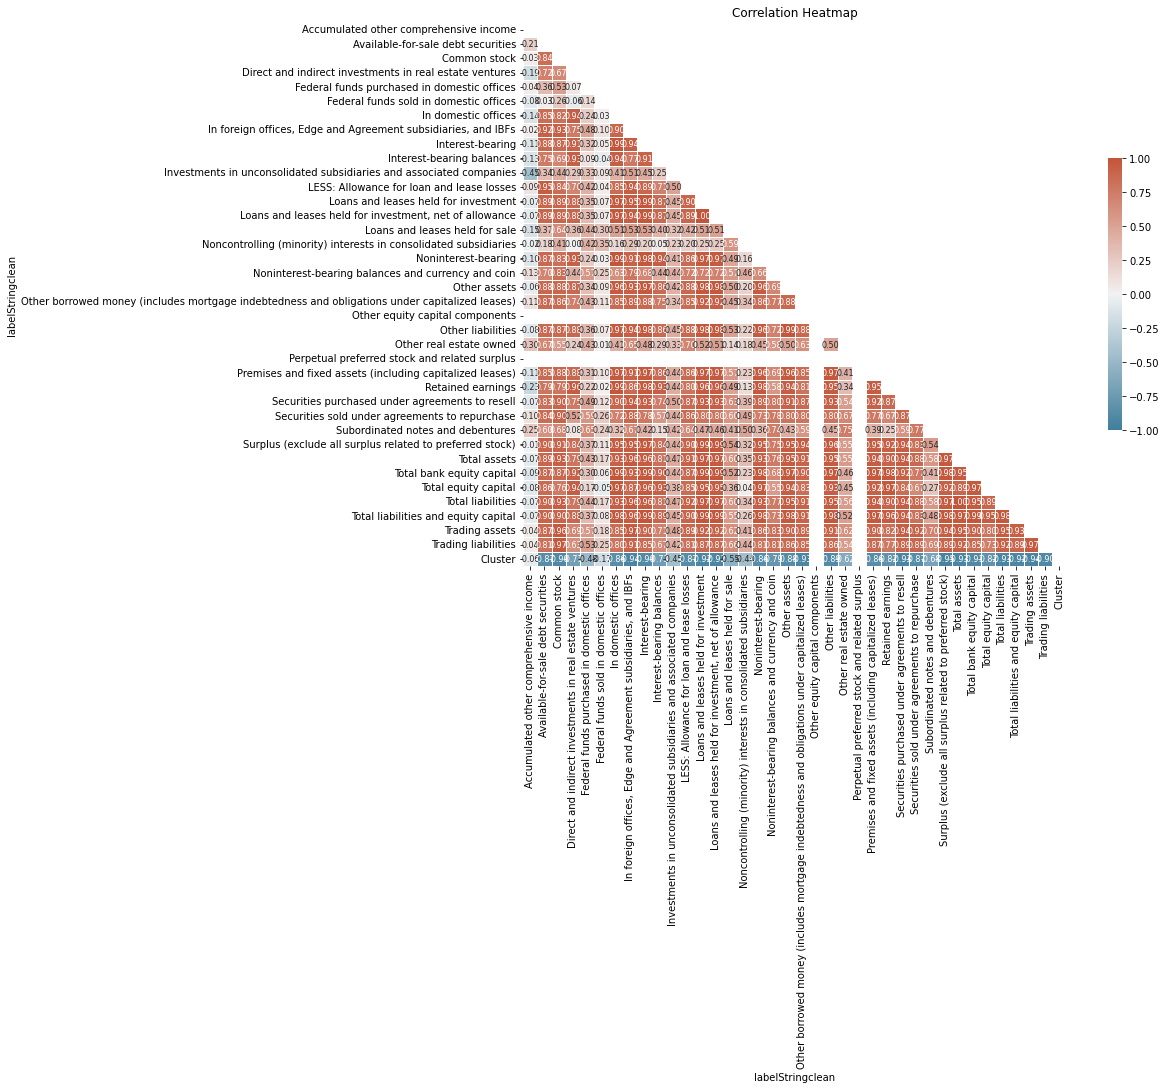

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df3.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8})

# High correlations with red color
plt.title('Correlation Heatmap')
plt.show()


In [38]:
# Yüksek korelasyonlu özellik çiftlerini bul
high_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
             if (abs(corr_matrix[col1][col2]) > 0.8) & (col1 != col2)]

# Yüksek korelasyonlu özellik çiftlerini yazdır
for (col1, col2) in high_corr:
    print(f"Feature pair ({col1}, {col2}) has high correlation")


Feature pair (Available-for-sale debt securities, Common stock) has high correlation
Feature pair (Available-for-sale debt securities, In domestic offices) has high correlation
Feature pair (Available-for-sale debt securities, In foreign offices, Edge and Agreement subsidiaries, and IBFs) has high correlation
Feature pair (Available-for-sale debt securities, Interest-bearing) has high correlation
Feature pair (Available-for-sale debt securities, LESS: Allowance for loan and lease losses) has high correlation
Feature pair (Available-for-sale debt securities, Loans and leases held for investment) has high correlation
Feature pair (Available-for-sale debt securities, Loans and leases held for investment, net of allowance) has high correlation
Feature pair (Available-for-sale debt securities, Noninterest-bearing) has high correlation
Feature pair (Available-for-sale debt securities, Other assets) has high correlation
Feature pair (Available-for-sale debt securities, Other borrowed money (i

In [39]:
# Düşük korelasyonlu özellik çiftlerini bul
low_corr = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
            if (abs(corr_matrix[col1][col2]) < 0.2) & (col1 != col2)]

# Düşük korelasyonlu özellik çiftlerini yazdır
for (col1, col2) in low_corr:
    print(f"Feature pair ({col1}, {col2}) has low correlation")


Feature pair (Accumulated other comprehensive income, Common stock) has low correlation
Feature pair (Accumulated other comprehensive income, Direct and indirect investments in real estate ventures) has low correlation
Feature pair (Accumulated other comprehensive income, Federal funds purchased in domestic offices) has low correlation
Feature pair (Accumulated other comprehensive income, Federal funds sold in domestic offices) has low correlation
Feature pair (Accumulated other comprehensive income, In domestic offices) has low correlation
Feature pair (Accumulated other comprehensive income, In foreign offices, Edge and Agreement subsidiaries, and IBFs) has low correlation
Feature pair (Accumulated other comprehensive income, Interest-bearing) has low correlation
Feature pair (Accumulated other comprehensive income, Interest-bearing balances) has low correlation
Feature pair (Accumulated other comprehensive income, LESS: Allowance for loan and lease losses) has low correlation
Featur

In [ ]:
from sklearn.decomposition import PCA

# Burada, özgün verinin %95'ini koruyacak şekilde otomatik olarak bileşen sayısını belirledik.
pca = PCA(n_components=0.95)

df_pca = pca.fit_transform(df3)

print("Original shape: ", df3.shape)
print("Transformed shape: ", df_pca.shape)


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(model, n_features_to_select=10)

# RFE'yi uygulayın
rfe.fit(df3, df3["Total assets"])  

mask = rfe.support_

print(df3.columns[mask])


Index(['In domestic offices',
       'In foreign offices, Edge and Agreement subsidiaries, and IBFs',
       'Interest-bearing', 'LESS: Allowance for loan and lease losses',
       'Loans and leases held for investment',
       'Loans and leases held for investment, net of allowance',
       'Noninterest-bearing',
       'Surplus (exclude all surplus related to preferred stock)',
       'Total assets', 'Cluster'],
      dtype='object', name='labelStringclean')


In [46]:
# RFE tarafından seçilen özelliklerle yeni bir dataframe oluşturalım
df_selected_features = df3[['In domestic offices',   'Interest-bearing', 'LESS: Allowance for loan and lease losses', 
                            'Loans and leases held for investment', 'Loans and leases held for investment, net of allowance', 'Noninterest-bearing', 'Surplus (exclude all surplus related to preferred stock)', 'Total assets', 'Cluster']]

# K-means clustering 
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_selected_features)

df_selected_features['Cluster'] = clusters 

# Küme ortalamalarını yazdırdık
print(df_selected_features.groupby('Cluster').mean())


labelStringclean  In domestic offices  Interest-bearing  \
Cluster                                                   
0                        1.070266e+12      1.011187e+12   
1                        2.913339e+10      2.614946e+10   

labelStringclean  LESS: Allowance for loan and lease losses  \
Cluster                                                       
0                                              1.453753e+10   
1                                              3.099143e+08   

labelStringclean  Loans and leases held for investment  \
Cluster                                                  
0                                         6.943231e+11   
1                                         2.171629e+10   

labelStringclean  Loans and leases held for investment, net of allowance  \
Cluster                                                                    
0                                                      6.797855e+11        
1                                                

C:\Users\fatih\AppData\Local\Temp\ipykernel_49652\3877676267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['Cluster'] = clusters


In [48]:
pip install matplotlib --upgrade



     ---------------------------------------- 7.5/7.5 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 470.4/470.4 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\fatih\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!pip install pandas==1.3.1
!pip install matplotlib==3.4.2


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [246 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm6


     ---------------------------------------- 4.7/4.7 MB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'

  error: subprocess-exited-with-error
  
  × Building wheel for matplotlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [562 lines of output]
      
      Edit setup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.4.2]
            python: yes [3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC
                        v.1929 64 bit (AMD64)]]
          platform: yes [win32]
             tests: no  [skipping due to configuration]
            macosx: no  [Mac OS-X only]
      
      C:\Users\fatih\AppData\Local\Temp\pip-build-env-09257kdh\overlay\Lib\site-packages\setuptools\dist.py:945: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated.
      !!
      
              ********************************************************************************
              Please replace its usage with implicit namespaces (PEP 420).
      
              See https://setuptool


     ---------------------------------------- 37.3/37.3 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build matplotlib


In [55]:
import pandas as pd
import matplotlib

print("pandas version: ", pd.__version__)
print("matplotlib version: ", matplotlib.__version__)


pandas version:  2.0.2
matplotlib version:  3.5.2


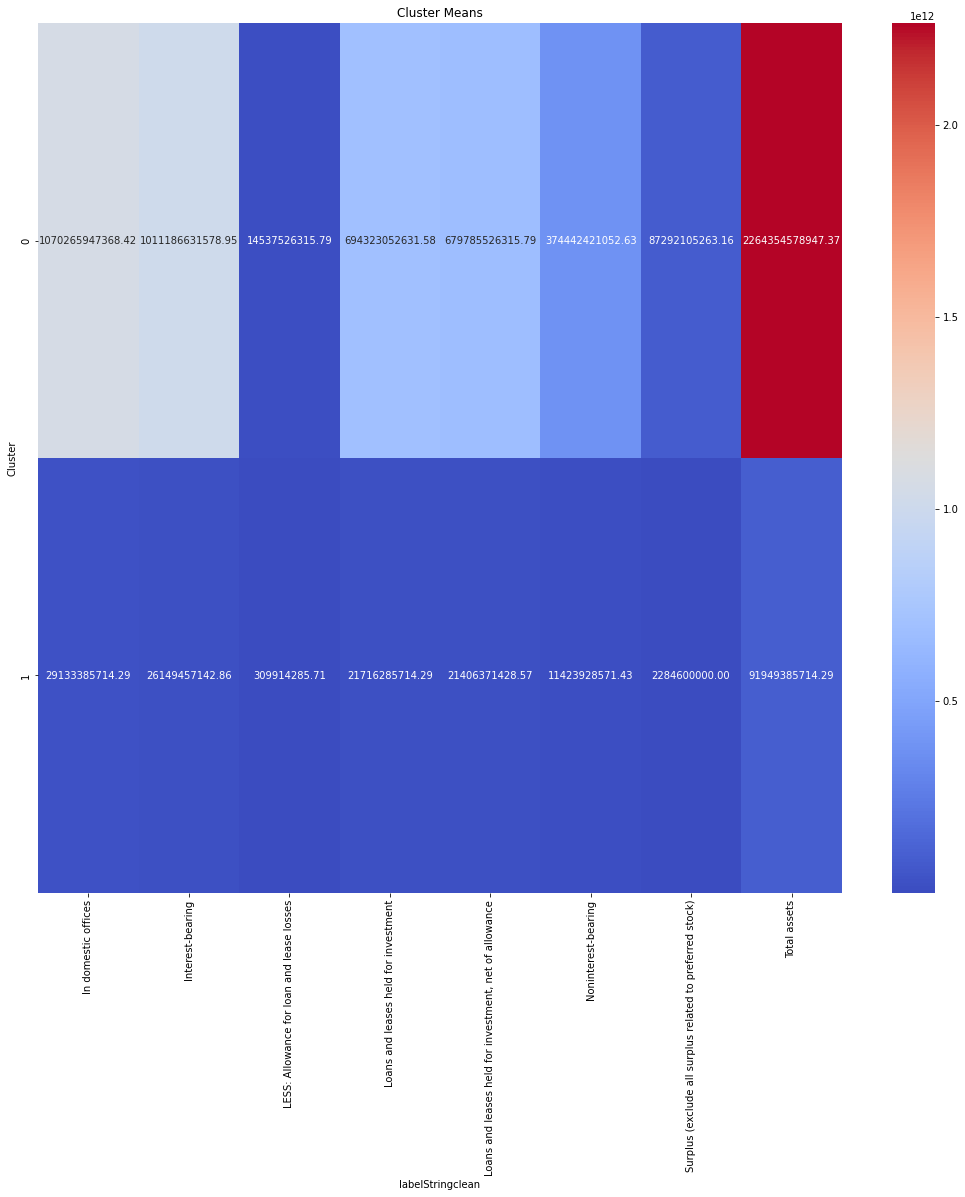

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_means = df_selected_features.groupby('Cluster').mean()

plt.figure(figsize=(18,16))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cluster Means')
plt.show()


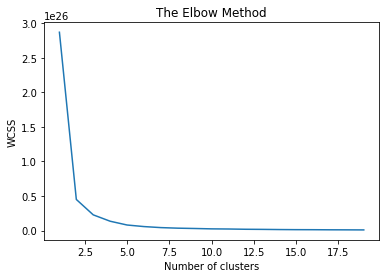

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] # within cluster sum of squares
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [45]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df3)

df3['Cluster'] = clusters  # Add cluster labels to your dataframe


C:\Users\fatih\AppData\Local\Temp\ipykernel_49652\1506993415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster'] = clusters  # Add cluster labels to your dataframe


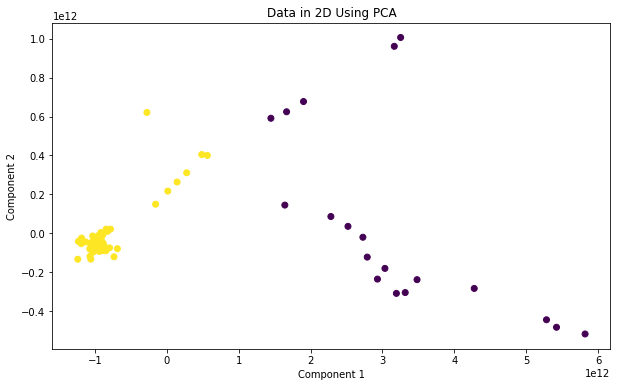

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # We reduce to 2 components for 2D visualization
reduced_data = pca.fit_transform(df3.drop('Cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df3['Cluster'])
plt.title('Data in 2D Using PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
